In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import math
# if using a Jupyter notebook, includue:
%matplotlib inline

In [2]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()

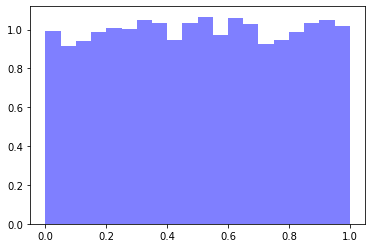

In [3]:
plt.hist(rng.uniform(size=(10000, )), 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

## Normal Distribution
\begin{align}
p(X;\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{align}

## Expectations
PDF: $p(x)$

\begin{align}
\mathbb{E}_p[f] = \int f(x)p(x)\,dx
\end{align}

Mean: $f(x)=x$

Variance: $f(x) = (x - \mathbb{E}[x])^2$



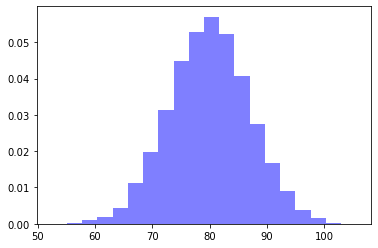

In [4]:
mu = 80
sigma = 7
x = rng.normal(mu, sigma, size=(10000,))

plt.hist(x, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

## Generate random normal samples with the Box-Muller transform

\begin{align}
u_1, u_2 &\sim U(0, 1)\\
R \; &= \sqrt{-2 \ln u_1}\\
\theta \; &= 2\pi \, u_2\\
z_1 &= R \cos(\theta)\\
z_2 &= R \sin(\theta)\\
\end{align}

Distance R of 2-dim Normal Distribution is Rayleigh distributed:

\begin{align}
f(x;\sigma) = \frac{x}{\sigma^2} \; \exp\left[\frac{-x^2}{2\sigma^2}\right]
\end{align}

Generate Rayleigh-distributed variable from Uniform with inverse transform sampling:

\begin{align}
X\,=\,\sigma\sqrt{-2 \ln U}
\end{align}

Box-Muller variant without the use of sine or cosine: Use rejection sampling to generate uniform samples over the unit circle.

In [5]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()

In [6]:
n = 10000
u = rng.uniform(size=(n, 2))
r = np.sqrt(-2.0 * np.log(u[:, 0]))
theta = 2.0 * np.pi * u[:, 1]
z1 = r * np.cos(theta)
z2 = r * np.sin(theta)

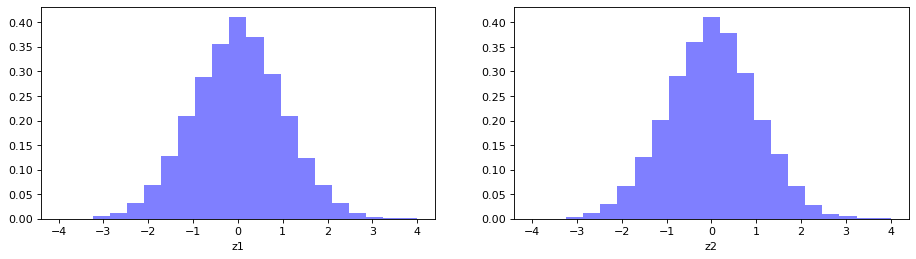

In [7]:
plt.figure(figsize=(14, 3.5), dpi=80)
plt.subplot(1, 2, 1)
plt.hist(z1, 21,
         range=(-4, 4),
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.xlabel("z1")

plt.subplot(1, 2, 2)
plt.hist(z2, 21,
         range=(-4, 4),
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.xlabel("z2")

plt.show()

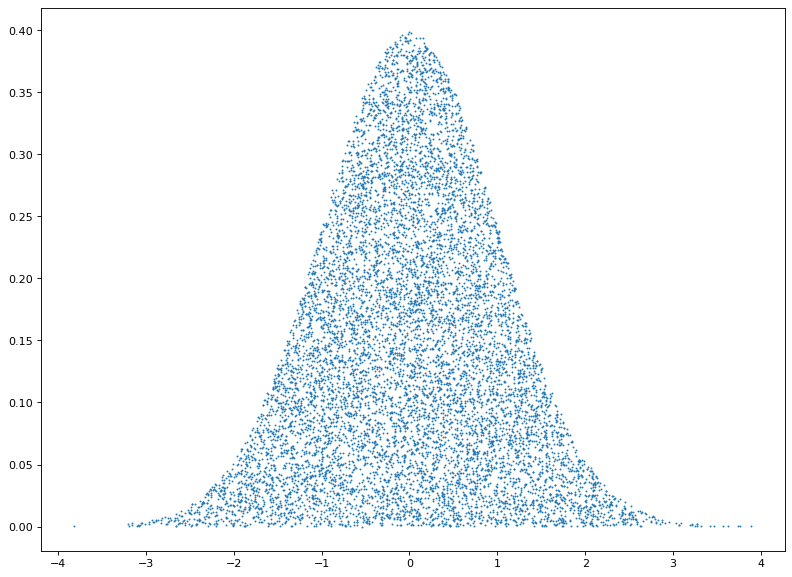

In [8]:
x = z1
y = rng.uniform(size=x.shape) * scipy.stats.norm().pdf(x)

plt.figure(figsize=(12, 9), dpi=80)
plt.scatter(x, y, s=0.5)
plt.show()

## Example Distributions

In [9]:
import numpy as np
import scipy.stats
import math

In [10]:
size=(7,)
c = rng.choice(3, p=[0.55, 0.25, 0.2], size=size)
m1 = rng.normal(scale=3.0, loc=-1.0, size=size)
m2 = rng.normal(scale=0.5, loc=3.5, size=size)
m3 = rng.uniform(-7.5, -5.5, size=size)
np.stack((m1, m2, m3), axis=-1)[np.arange(len(c)), c]

array([-6.42334028,  3.56009839,  0.94663658, -6.43211539, -1.98481778,
        3.1163861 , -6.44902348])

In [11]:
class Density:
    name = "unset"
    def pdf(self, x):
        raise NotImplementedError()
    def sample(self, size=()):
        raise NotImplementedError()
    def plot_range(self):
        return (-5.0, 5.0)
    def plot_name(self):
        return self.name

class DensityA(Density):
    name = "standard normal"
    def __init__(self, loc=0.0, scale=1.0):
        self.loc = loc
        self.scale = scale
    def pdf(self, x):
        return scipy.stats.norm(loc=self.loc, scale=self.scale).pdf(x)
    def sample(self, size=()):
        return rng.normal(loc=self.loc, scale=self.scale, size=size)

class DensityB(Density):
    name = "mixture"
    def __init__(self):
        pass
    def pdf(self, x):
        return (
            scipy.stats.norm(scale=3.0, loc=-1.0).pdf(x) * 0.55 +
            scipy.stats.norm(scale=0.5, loc=3.5).pdf(x) * 0.25 +
            scipy.stats.uniform(loc=-7.5, scale=2.0).pdf(x) * 0.2
        )
    def sample(self, size=()):
        c = rng.choice(3, p=[0.55, 0.25, 0.2], size=size)
        m1 = rng.normal(scale=3.0, loc=-1.0, size=size)
        m2 = rng.normal(scale=0.5, loc=3.5, size=size)
        m3 = rng.uniform(-7.5, -5.5, size=size)
        return np.stack((m1, m2, m3), axis=-1)[np.arange(len(c)), c]
    def plot_range(self):
        return (-12.0, 12.0)
    
class DensityC(Density):
    name = "exponential"
    def __init__(self):
        pass
    def pdf(self, x):
        return (
            scipy.stats.expon().pdf(x)
        )
    def sample(self, size=()):
        return rng.exponential(size=size)
    def plot_range(self):
        return (-1.0, 10.0)
    
class DensityD(Density):
    name = "islands"
    def __init__(self):
        self.param = np.asarray([[0.2, -4.5], [0.5, 7.5], [0.75, 1.0]], dtype=np.float32)
        self.w = np.asarray([0.4, 0.35, 0.25], dtype=np.float32)
        self.gaussians = [scipy.stats.norm(scale=v[0], loc=v[1]) for v in self.param]
    def pdf(self, x):
        return (np.stack([g.pdf(x) for g in self.gaussians], axis=-1) * self.w[None, :]).sum(-1)
    def sample(self, size=()):
        c = rng.choice(len(self.w), p=self.w, size=size)
        return np.stack(
            [rng.normal(scale=v[0], loc=v[1], size=size) for v in self.param], axis=-1)[np.arange(len(c)), c]
    def plot_range(self):
        return (-7.5, 11.0)

densities = {
    "standard_normal": DensityA(),
    "mixture": DensityB(),
    "exponential": DensityC(),
    "islands": DensityD(),
}

### Plot densities

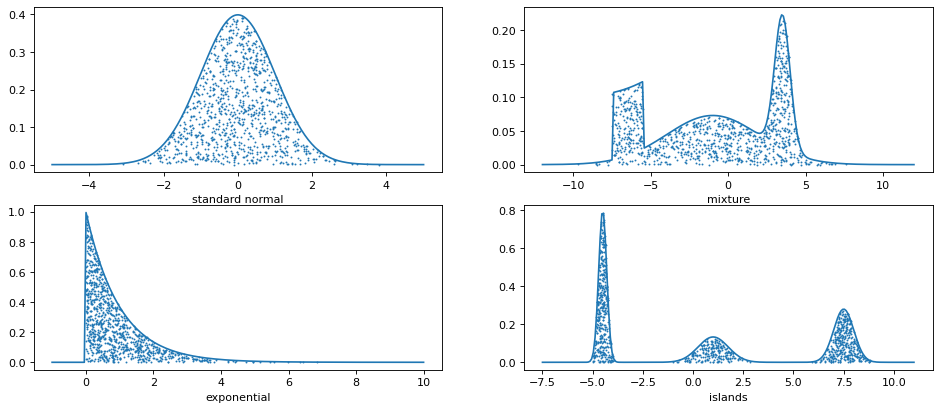

In [12]:
n_cols_max = 2
n_plots = len(densities)
n_rows = (n_plots - 1) // n_cols_max + 1
n_cols = min(n_plots, n_cols_max)

plt.figure(figsize=(14.5, 3.0 * n_rows), dpi=80)
x_base = np.linspace(0.0, 1.0, 220)
n_sample = 1000
for i, (k, d) in enumerate(densities.items()):
    plt.subplot(n_rows, n_cols, i+1)
    # PDF
    a, b = d.plot_range()
    x = x_base * (b - a) + a
    plt.plot(x, d.pdf(x))
    plt.xlabel(d.plot_name())
    # SAMPLES
    try:
        s = d.sample(size=(n_sample, ))
        plt.scatter(s, rng.uniform(size=(n_sample, )) * d.pdf(s), s=0.5)
    except NotImplementedError:
        pass
    
plt.show()

## Monte-Carlo Integration

\begin{align}
F := \int f(x)p(x)dx \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{p(x_i)} =: \hat{F} \quad\text{if}\; x_i \sim p \;\text{i.i.d.}
\end{align}

#### Example on definite integral
\begin{align}
\int_{0}^{\pi} \sin{(x)} dx = \left[-\cos{(x)}\right]_{0}^{\pi} = 2 \\
\approx \frac{1}{N} \sum_{i=1}^{N}\frac{\sin{(x_i)}}{p(x_i)} \quad \text{with}\; p(x)=U(0, \pi) \; \text{and} \; x_i \sim p(x)
\end{align}

In [13]:
# i.i.d. samples from U[0, pi]
r = np.random.uniform(0, np.pi, size=(10000, ))
# MC estimate
f = (np.sin(r) / scipy.stats.uniform(loc=0.0, scale=np.pi).pdf(r)).mean()
print(f"Monte-Carlo estimate: {f}")

Monte-Carlo estimate: 2.0075407066687987


#### Example: integrate density

\begin{align}
F = \int p(x)dx = 1
\end{align}

In [14]:
def monte_carlo_integral(density, n_samples=10000):
    a, b = density.plot_range()
    r = rng.uniform(a, b, size=(n_samples, ))
    f = (density.pdf(r) / scipy.stats.uniform(loc=a, scale=b - a).pdf(r)).mean()
    return f

In [15]:
for k, d in densities.items():
    f = monte_carlo_integral(d)
    print(f"{k:>20}: {f}")

     standard_normal: 0.9827786456240949
             mixture: 0.999877006997889
         exponential: 0.9682629393055197
             islands: 1.0082242330435995


#### Example: Monte-Carlo Integration for moments of Normal Distribution

In [16]:
1/math.sqrt(2*math.pi)

0.3989422804014327

In [17]:
mu = 80.0
sigma = 7.0
x = np.random.normal(mu, sigma, size=(10000,))


### Metropolis-Hastings

In [18]:
import ipywidgets as widgets
from IPython.display import display
import time

In [23]:
def sample_metropolis_hastings(density, sigma=0.4, samples=2500, parallel=1000, burn_in=100, progress=False):
    if progress:
        fs = widgets.IntProgress(min=0, max=samples, description="Generating: ")
        fb = widgets.IntProgress(min=0, max=burn_in, description="Burn in: ", style={'bar_color': 'maroon'},)
        
        display(fb) # display the bar
        display(fs)
    else:
        fs = fb = None
    
    # Initial value?
    # x_t = np.zeros(shape=(parallel, ), dtype=np.float32)
    x_t = density.sample(size=(parallel, ))

    output = np.empty(shape=(samples, parallel,), dtype=np.float32)
    for step in range(burn_in + samples):
        x_proposal = rng.normal(loc=x_t, scale=sigma, size=(parallel, ))
        a = density.pdf(x_proposal) / density.pdf(x_t)
        m = a >= rng.uniform(size=(parallel, ))
        x_t = np.where(m, x_proposal, x_t)
        
        if step >= burn_in:
            s = step - burn_in
            output[s, :] = x_t
    
            if fs is not None and s % 100 == 0:
                fs.value = s # signal to increment the progress bar
                fb.value = burn_in
                
        elif fb is not None and step % 100 == 0:
            fb.value = step

    if f:
        fs.value = steps
    return output.reshape([-1])

#### Run and plot

IntProgress(value=0, description='Burn in: ', max=1000, style=ProgressStyle(bar_color='maroon'))

IntProgress(value=0, description='Generating: ', max=10000)

IntProgress(value=0, description='Burn in: ', max=1000, style=ProgressStyle(bar_color='maroon'))

IntProgress(value=0, description='Generating: ', max=10000)

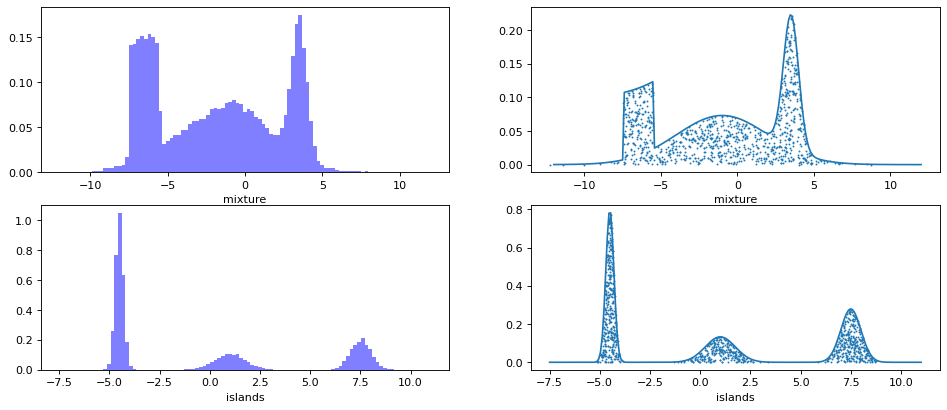

In [32]:
burn_in = 1000
samples = 10000
parallel = 10

# density = densities["mixture"]
# density = densities["islands"]
# density = densities["exponential"]

ds = [
    densities["mixture"],
    densities["islands"],
]
mh_proposal_sigmas = [0.25, 1.5]

n_plots = len(ds)
n_rows = n_plots
n_cols = 2

plt.figure(figsize=(14.5, 3.0 * n_rows), dpi=80)
x_base = np.linspace(0.0, 1.0, 220)

for i, (d, sigma) in enumerate(zip(ds, mh_proposal_sigmas)):
    
    output = sample_metropolis_hastings(d, samples=samples, parallel=parallel, burn_in=burn_in,
                                        sigma=sigma, progress=True)
    
    
    a, b = d.plot_range()
    
    plt.subplot(n_rows, n_cols, (i*2)+1)
    
    plt.hist(
        output,
        101,
        range=(a, b),
        density=True,
        histtype='bar',
        facecolor='b',
        alpha=0.5
    )
    
    plt.xlabel(d.plot_name())
    
    # PDF
    plt.subplot(n_rows, n_cols, (i*2)+2)
    
    x = x_base * (b - a) + a
    plt.plot(x, d.pdf(x))
    plt.xlabel(d.plot_name())
    # SAMPLES
    try:
        s = d.sample(size=(n_sample, ))
        plt.scatter(s, rng.uniform(size=(n_sample, )) * d.pdf(s), s=0.5)
    except NotImplementedError:
        pass


plt.show()

### Plot

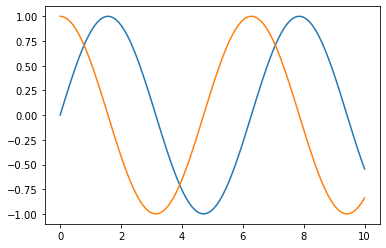

In [21]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

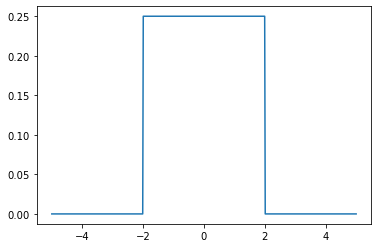

In [22]:
x = np.linspace(-5, 5, 550)
# y = scipy.stats.norm().pdf(x)
y = scipy.stats.uniform(-2, 4).pdf(x)
plt.plot(x, y)
plt.show()